<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/teste_tif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Configurando o ambiente**



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Instalção de Pacotes
!pip install rasterio
!pip install geopandas

     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 
     |████████████████████████████████| 16.7 MB 34.1 MB/s 


In [19]:
#Importação de Libs
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio
from rasterio.plot import show

## **2. Carregando/preparando as imagens**

In [5]:
export_map = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/teste_tif/export_maps_default.tif'
export_raster_d = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/teste_tif/export_raster_default.tif'
export_raster_m = r'/content/drive/MyDrive/TCC/dataset_imagens/imagens_recortadas/teste_tif/export_raster_maintain_clipping.tif'

In [6]:
ds_export_map = rasterio.open(export_map)
ds_export_raster_d = rasterio.open(export_raster_d)
ds_export_raster_m = rasterio.open(export_raster_m)

In [10]:
mdata_export_map = ds_export_map.read()
mdata_export_raster_d = ds_export_raster_d.read()
mdata_export_raster_m = ds_export_raster_m.read()

In [12]:
mdata_export_map

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [13]:
mdata_export_raster_d

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [14]:
mdata_export_raster_m

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [15]:
ds_export_map.meta

{'count': 4,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 756,
 'nodata': None,
 'transform': Affine(0.0036634003609769534, 0.0, -62.28721434658804,
       0.0, -0.003663400360976952, -5.843810423707085),
 'width': 1564}

In [16]:
ds_export_raster_d.meta

{'count': 2,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': None,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

In [18]:
ds_export_raster_m.meta

{'count': 2,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 11367,
 'nodata': None,
 'transform': Affine(0.00013160318912350987, 0.0, -60.900386018843214,
       0.0, -0.00013160318912350987, -6.372438915518303),
 'width': 13233}

## **3. Visualiznado as imagens**

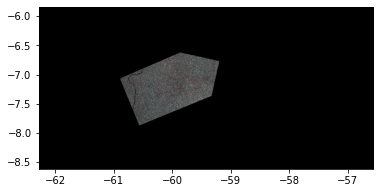

In [20]:
show(ds_export_map)

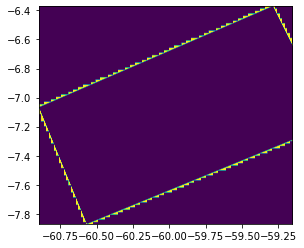

In [21]:
show(ds_export_raster_d)

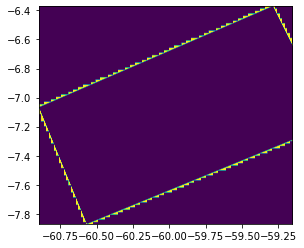

In [22]:
show(ds_export_raster_m)